# In the following is the influence of the mesh refinement examined and its affects to the convergence 

#### The simulation was run with two meshes of different refinement levels. They will be refered to as 1 to 2. 1 being the least and 2 the most refined.


lets say here is something written 

### Direct comparison of the residuals of each field variable

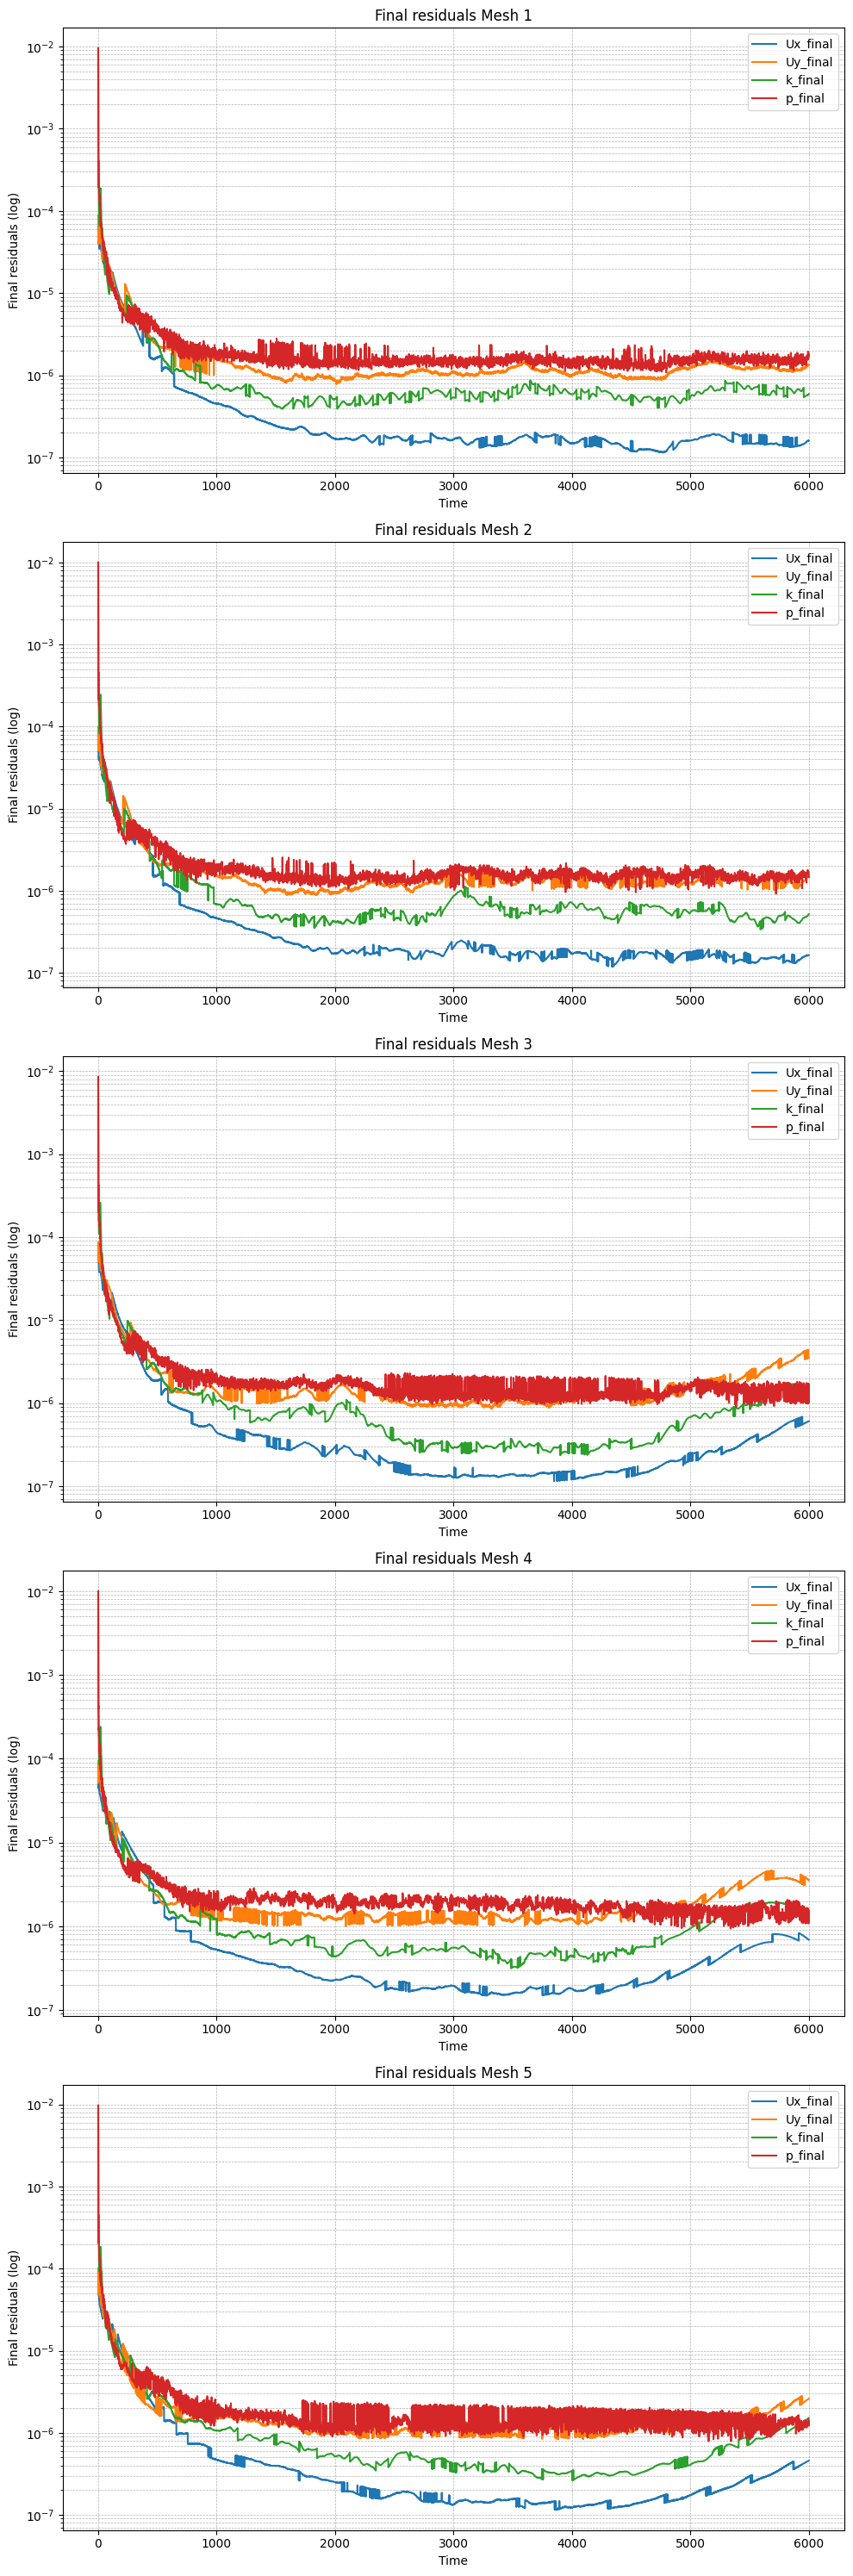

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Spaltennamen definieren
colnames = [
    "Time", "U_solver", "Ux_initial", "Ux_final", "Ux_iters",
    "Uy_initial", "Uy_final", "Uy_iters", "U_converged",
    "k_solver", "k_initial", "k_final", "k_iters", "k_converged",
    "p_solver", "p_initial", "p_final", "p_iters", "p_converged"
]

# number of tested meshes 
num_meshes = 5

# Figur für alle Subplots vorbereiten
plt.figure(figsize=(10, 6 * num_meshes))

# Schleife über alle Meshes
for i in range(1, num_meshes + 1):
    # Pfad zur Datei
    filepath = f'output/MeshConvergence/mesh_{i}/postProcessing/solverInfo/0/solverInfo.dat'
    
    # Datei einlesen
    df = pd.read_csv(filepath, sep=r'\s+', skiprows=2, names=colnames)
    
    # Subplot erstellen
    plt.subplot(num_meshes, 1, i)
    plt.plot(df["Time"], df["Ux_final"], label="Ux_final")
    plt.plot(df["Time"], df["Uy_final"], label="Uy_final")
    plt.plot(df["Time"], df["k_final"], label="k_final")
    plt.plot(df["Time"], df["p_final"], label="p_final")
    
    plt.xlabel("Time")
    plt.ylabel("Final residuals (log)")
    plt.title(f"Final residuals Mesh {i}")
    plt.yscale('log')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

### Comparison of the residuals of each mesh plotted over time

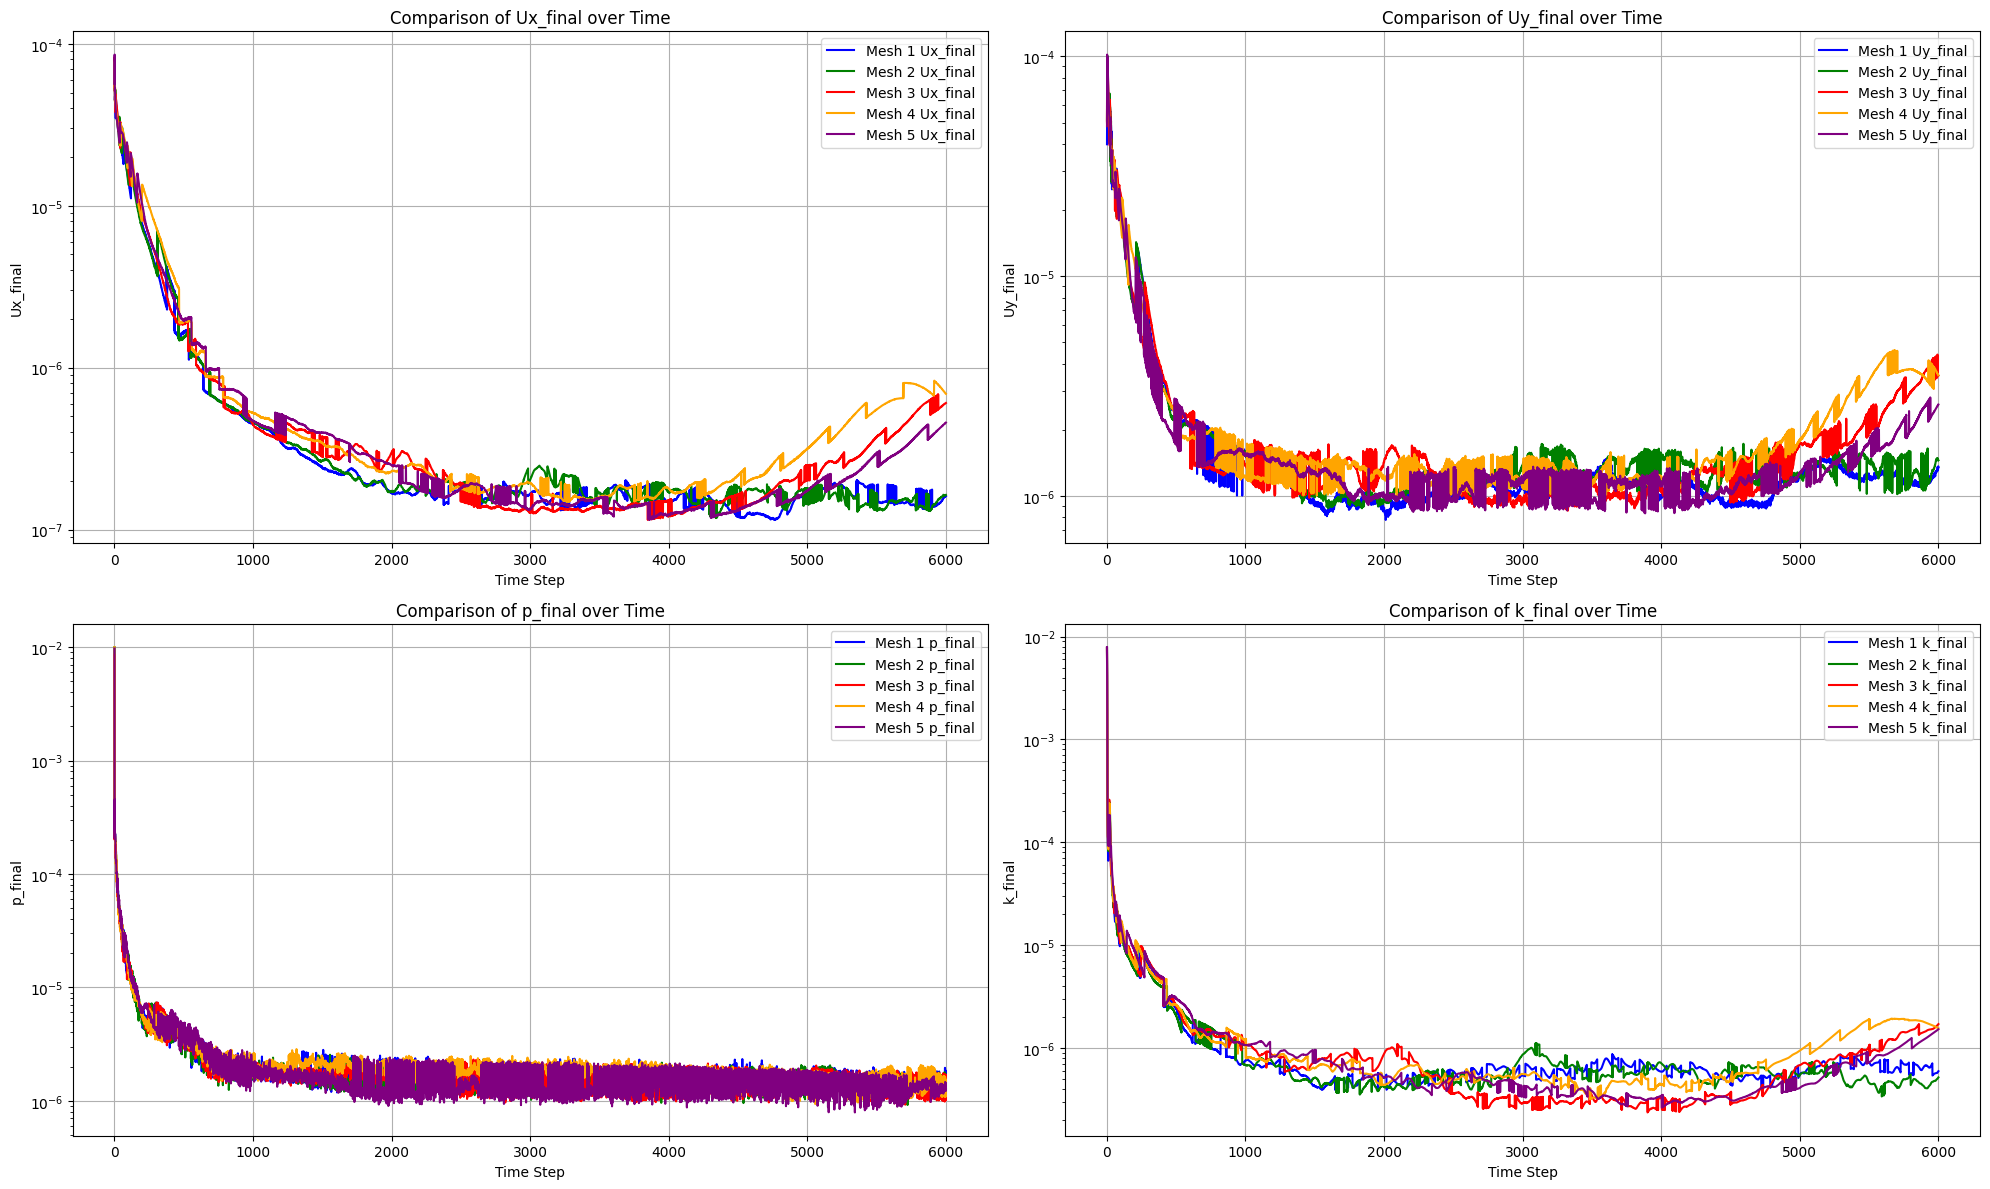

In [2]:
# Farben für die Meshes
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Daten einlesen und speichern
dfs = []
for i in range(1, num_meshes + 1):
    path = f'output/MeshConvergence/mesh_{i}/postProcessing/solverInfo/0/solverInfo.dat'
    df = pd.read_csv(path, sep=r'\s+', skiprows=2, names=colnames)
    dfs.append(df)

# Plotten
plt.figure(figsize=(20, 12))

# Ux_final
plt.subplot(2, 2, 1)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["Ux_final"], label=f"Mesh {i+1} Ux_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('Ux_final')
plt.title('Comparison of Ux_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Uy_final
plt.subplot(2, 2, 2)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["Uy_final"], label=f"Mesh {i+1} Uy_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('Uy_final')
plt.title('Comparison of Uy_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# p_final
plt.subplot(2, 2, 3)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["p_final"], label=f"Mesh {i+1} p_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('p_final')
plt.title('Comparison of p_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# k_final
plt.subplot(2, 2, 4)
for i, df in enumerate(dfs):
    plt.plot(df["Time"], df["k_final"], label=f"Mesh {i+1} k_final", color=colors[i])
plt.xlabel('Time Step')
plt.ylabel('k_final')
plt.title('Comparison of k_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Layout und Anzeige
plt.tight_layout()
plt.show()


## Comparison of the wall shear stresses

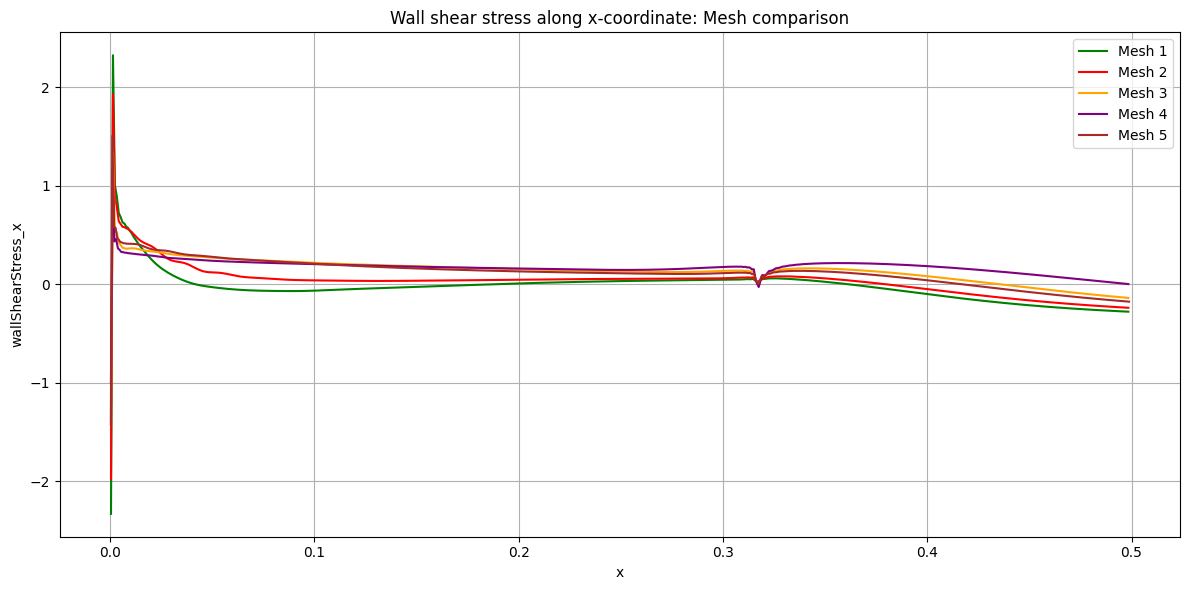

In [3]:
# Farbliste (mehr Farben bei Bedarf hinzufügen)
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan']

# Figur vorbereiten
plt.figure(figsize=(12, 6))

# Schleife über die Mesh-Indizes
for i in range(1, num_meshes + 1):
    filepath = f"output/MeshConvergence/mesh_{i}/postProcessing/samples/6000/wallShearStress_lowerWall.raw"

    # Datei einlesen
    data = pd.read_csv(filepath, comment='#', sep=r'\s+', header=None)
    data.columns = [
        "x", "y", "z", 
        "wss_x", "wss_y", "wss_z", 
        "area_x", "area_y", "area_z"
    ]

    # Sortieren und Bereich filtern
    data = data.sort_values("x")
    data = data[(data["x"] >= 0) & (data["x"] <= 0.5)]

    # Plotten
    plt.plot(data["x"], data["wss_x"], label=f"Mesh {i}", color=colors[i % len(colors)])

# Plot anpassen
plt.xlabel("x")
plt.ylabel("wallShearStress_x")
plt.title("Wall shear stress along x-coordinate: Mesh comparison")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### comparison with the experimental data 

In [4]:
# x-Werte, an denen verglichen werden soll
x_values = [0.082, 0.122, 0.162, 0.202, 0.242, 0.282, 0.386]

# Dictionary zur späteren Erstellung des Vergleichs-DataFrames
comparison_dict = {"x": x_values}

# Schleife über alle Meshes
for mesh_num in range(1, num_meshes + 1):
    filepath = f"output/MeshConvergence/mesh_{mesh_num}/postProcessing/samples/6000/wallShearStress_lowerWall.raw"

    # Datei einlesen
    data = pd.read_csv(filepath, comment='#', sep=r'\s+', header=None)
    data.columns = [
        "x", "y", "z", 
        "wss_x", "wss_y", "wss_z", 
        "area_x", "area_y", "area_z"
    ]
    
    # Einschränkung auf relevanten x-Bereich
    data = data[(data["x"] >= 0) & (data["x"] <= 0.5)]

    # Interpolation
    data_interpolated = data.set_index("x").interpolate(method="linear")
    wss_values = data_interpolated["wss_x"].iloc[
        [np.abs(data_interpolated.index - x).argmin() for x in x_values]
    ].values

    # In das Dictionary einfügen
    comparison_dict[f"Mesh {mesh_num}"] = wss_values

# DataFrame erzeugen und anzeigen
comparison_df = pd.DataFrame(comparison_dict).set_index("x")
print(comparison_df)


         Mesh 1    Mesh 2    Mesh 3    Mesh 4    Mesh 5
x                                                      
0.082 -0.068462  0.051328  0.235817  0.214288  0.230299
0.122 -0.046575  0.034331  0.200314  0.191765  0.184418
0.162 -0.018024  0.037901  0.175341  0.173339  0.152039
0.202  0.009881  0.046980  0.151721  0.159334  0.129651
0.242  0.029380  0.054015  0.133352  0.146723  0.113946
0.282  0.040917  0.057702  0.124600  0.158830  0.104564
0.386 -0.061820 -0.014039  0.111298  0.200179  0.071506
